#Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import json
import random
import cv2 as cv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/malaria'

# Loading data from nested json file

### Brute force

In [0]:
data = pd.read_json('data/test.json')
data.head()

,image,objects
0,{'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2...,"[{'bounding_box': {'minimum': {'r': 576, 'c': ..."
1,{'checksum': '2d85fc8ffdb875bb569878243437e4f5...,"[{'bounding_box': {'minimum': {'r': 1048, 'c':..."
2,{'checksum': 'f7c02b6247f3ccfcd4a22c1f06e0c72c...,"[{'bounding_box': {'minimum': {'r': 979, 'c': ..."
3,{'checksum': '50634ef166ae993b4562b96f315ff6db...,"[{'bounding_box': {'minimum': {'r': 402, 'c': ..."
4,{'checksum': '74dd777a74e5a4b24aaee574a99e1459...,"[{'bounding_box': {'minimum': {'r': 314, 'c': ..."


### Data structure check

In [0]:
data['image'][0], data['objects'][0]

({'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2',
  'pathname': '/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg',
  'shape': {'c': 1944, 'channels': 3, 'r': 1383}},
 [{'bounding_box': {'maximum': {'c': 1883, 'r': 708},
    'minimum': {'c': 1744, 'r': 576}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 1373, 'r': 977},
    'minimum': {'c': 1249, 'r': 863}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 1711, 'r': 335},
    'minimum': {'c': 1573, 'r': 210}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 1253, 'r': 1142},
    'minimum': {'c': 1124, 'r': 1017}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 1763, 'r': 695},
    'minimum': {'c': 1655, 'r': 572}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 1429, 'r': 590},
    'minimum': {'c': 1307, 'r': 477}},
   'category': 'red blood cell'},
  {'bounding_box': {'maximum': {'c': 738, 'r': 1089},
    'minimum': 

### Img preview check

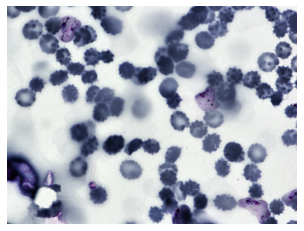

In [0]:
img_path ='data/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'

img = cv.imread(img_path, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### Read json one more time

In [0]:
f = open('data/training.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

### flatten_json() to flatten nested elements in dictionary

In [0]:
def flatten_json(nested_json):
    """
        Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out


### Reformat each line of json to get df friendly structure

In [0]:
new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

new_json[0]

{'image_checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
 'image_pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
 'image_shape_c': 1600,
 'image_shape_channels': 3,
 'image_shape_r': 1200,
 'objects_0_bounding_box_maximum_c': 1540,
 'objects_0_bounding_box_maximum_r': 1158,
 'objects_0_bounding_box_minimum_c': 1440,
 'objects_0_bounding_box_minimum_r': 1057,
 'objects_0_category': 'red blood cell',
 'objects_10_bounding_box_maximum_c': 1433,
 'objects_10_bounding_box_maximum_r': 862,
 'objects_10_bounding_box_minimum_c': 1326,
 'objects_10_bounding_box_minimum_r': 755,
 'objects_10_category': 'red blood cell',
 'objects_11_bounding_box_maximum_c': 210,
 'objects_11_bounding_box_maximum_r': 475,
 'objects_11_bounding_box_minimum_c': 120,
 'objects_11_bounding_box_minimum_r': 389,
 'objects_11_category': 'red blood cell',
 'objects_12_bounding_box_maximum_c': 500,
 'objects_12_bounding_box_maximum_r': 428,
 'objects_12_bounding_box_minimum_c': 408,
 'objects_12_bounding_box_

### Dump new_json to str locally

In [0]:
json_string = json.dumps(new_json)
type(json_string)

str

### Read json using pandas, change `orient` param to index

In [0]:
df_train = pd.read_json(json_string, orient ='index')
df_train[df_train['objects_222_category'] == 'red blood cell']

#634

categories = df_train.loc[0, [x for x in df_train.columns if 'category' in x]].astype('category')
categories.describe()

count                 74
unique                 2
top       red blood cell
freq                  71
Name: 0, dtype: object

In [0]:
df_train.shape

(1208, 1120)

## DF test loading

In [0]:
f = open('data/test.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

json_string = json.dumps(new_json)

df_test = pd.read_json(json_string, orient ='index')
df_test

,image_checksum,image_pathname,image_shape_r,image_shape_c,image_shape_channels,objects_0_bounding_box_minimum_r,objects_0_bounding_box_minimum_c,objects_0_bounding_box_maximum_r,objects_0_bounding_box_maximum_c,objects_0_category,objects_1_bounding_box_minimum_r,objects_1_bounding_box_minimum_c,objects_1_bounding_box_maximum_r,objects_1_bounding_box_maximum_c,objects_1_category,objects_2_bounding_box_minimum_r,objects_2_bounding_box_minimum_c,objects_2_bounding_box_maximum_r,objects_2_bounding_box_maximum_c,objects_2_category,objects_3_bounding_box_minimum_r,objects_3_bounding_box_minimum_c,objects_3_bounding_box_maximum_r,objects_3_bounding_box_maximum_c,objects_3_category,objects_4_bounding_box_minimum_r,objects_4_bounding_box_minimum_c,objects_4_bounding_box_maximum_r,objects_4_bounding_box_maximum_c,objects_4_category,objects_5_bounding_box_minimum_r,objects_5_bounding_box_minimum_c,objects_5_bounding_box_maximum_r,objects_5_bounding_box_maximum_c,objects_5_category,objects_6_bounding_box_minimum_r,objects_6_bounding_box_minimum_c,objects_6_bounding_box_maximum_r,objects_6_bounding_box_maximum_c,objects_6_category,...,objects_100_bounding_box_minimum_r,objects_100_bounding_box_minimum_c,objects_100_bounding_box_maximum_r,objects_100_bounding_box_maximum_c,objects_100_category,objects_101_bounding_box_minimum_r,objects_101_bounding_box_minimum_c,objects_101_bounding_box_maximum_r,objects_101_bounding_box_maximum_c,objects_101_category,objects_102_bounding_box_minimum_r,objects_102_bounding_box_minimum_c,objects_102_bounding_box_maximum_r,objects_102_bounding_box_maximum_c,objects_102_category,objects_103_bounding_box_minimum_r,objects_103_bounding_box_minimum_c,objects_103_bounding_box_maximum_r,objects_103_bounding_box_maximum_c,objects_103_category,objects_104_bounding_box_minimum_r,objects_104_bounding_box_minimum_c,objects_104_bounding_box_maximum_r,objects_104_bounding_box_maximum_c,objects_104_category,objects_105_bounding_box_minimum_r,objects_105_bounding_box_minimum_c,objects_105_bounding_box_maximum_r,objects_105_bounding_box_maximum_c,objects_105_category,objects_106_bounding_box_minimum_r,objects_106_bounding_box_minimum_c,objects_106_bounding_box_maximum_r,objects_106_bounding_box_maximum_c,objects_106_category,objects_107_bounding_box_minimum_r,objects_107_bounding_box_minimum_c,objects_107_bounding_box_maximum_r,objects_107_bounding_box_maximum_c,objects_107_category
0,eea3bfd6a929bcb06f9786667cd3fbb2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1383,1944,3,576,1744,708,1883,red blood cell,863,1249,977,1373,red blood cell,210,1573,335,1711,red blood cell,1017,1124,1142,1253,red blood cell,572,1655,695,1763,red blood cell,477,1307,590,1429,red blood cell,962,595,1089,738,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2d85fc8ffdb875bb569878243437e4f5,/images/64985a1e-16bb-4016-a01c-c21a5b86e572.jpg,1383,1944,3,1048,1632,1170,1767,red blood cell,915,1155,1058,1292,red blood cell,735,1237,868,1367,red blood cell,258,1755,390,1891,red blood cell,922,1521,1049,1656,red blood cell,794,1608,914,1731,red blood cell,333,1264,460,1401,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f7c02b6247f3ccfcd4a22c1f06e0c72c,/images/c70894fa-50e8-4eed-a5a8-159a20153a49.jpg,1383,1944,3,979,960,1107,1095,red blood cell,1214,114,1332,235,red blood cell,1051,638,1188,782,red blood cell,759,189,872,315,red blood cell,1226,1209,1354,1327,red blood cell,1102,312,1206,446,red blood cell,1002,402,1129,518,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50634ef166ae993b4562b96f315ff6db,/images/abb72ce2-4193-4dd3-a34c-61c2ee22ccff.jpg,1383,1944

In [0]:
df_test.shape

(120, 545)

# Data visualization

### DrawImg class

In [0]:
class DrawImg:
    
    def __init__ (self,df, row_index=0):
        df= df.copy()

        if row_index < 0 or row_index > df.shape[0]-1:
            raise ValueError("wrong index! Try with numbers between 0 and " + str(df.shape[0]-1) + ".")
        
        self.categories = df[[x for x in df.columns if 'category' in x]]
        self.categories_set= self.find_categories()
        
        self.chosen_img_index = row_index
        self.chosen_img = df.loc[row_index, :]
        self.chosen_img_objects_count = self.categories.loc[row_index, :].count().sum()
        self.chosen_img_pathname = 'data/' + df.loc[row_index, 'image_pathname'].replace('/','',1)
        
        
        self.dict_with_colors = self.define_colors()
    
    
    def find_categories(self):
        
        final_set = []
        for i in self.categories:
            current  = list(set(self.categories[i]))
            final_set += current
        return set(final_set)
    
    
    def define_colors(self):
        _dict = {}

        _dict['gametocyte'] = (15, 152, 196)
        _dict['difficult'] = (202, 109, 34)
        _dict['ring'] = (20, 114, 254)
        _dict['schizont'] = (245, 53, 19)
        _dict['trophozoite']= (221, 13, 29)    
            
        _dict['red blood cell'] = (0,255,0)
        _dict['leukocyte'] = (150,255,130)
        
        return _dict
    
    
    def plot(self):
        plt.figure(figsize=(16,13))
        img = cv.imread(self.chosen_img_pathname, 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        for i in range(self.chosen_img_objects_count):
            cell_type = self.chosen_img['objects_' + str(i)  + '_category']
            p_1 =  int(self.chosen_img['objects_' + str(i) + '_bounding_box_minimum_c']), int(self.chosen_img['objects_' + str(i) + '_bounding_box_minimum_r'])
            p_2 =  int(self.chosen_img['objects_' + str(i) + '_bounding_box_maximum_c']), int(self.chosen_img['objects_' + str(i) + '_bounding_box_maximum_r'])
            img = cv.rectangle(img, p_1, p_2, self.dict_with_colors[cell_type],2)
            if cell_type not in {'red blood cell'}:
                img = cv.putText(img, cell_type.upper(), p_1, cv.FONT_HERSHEY_SIMPLEX, 1.5, self.dict_with_colors[cell_type],3)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Image : " +  str(self.chosen_img_index))
        plt.show()

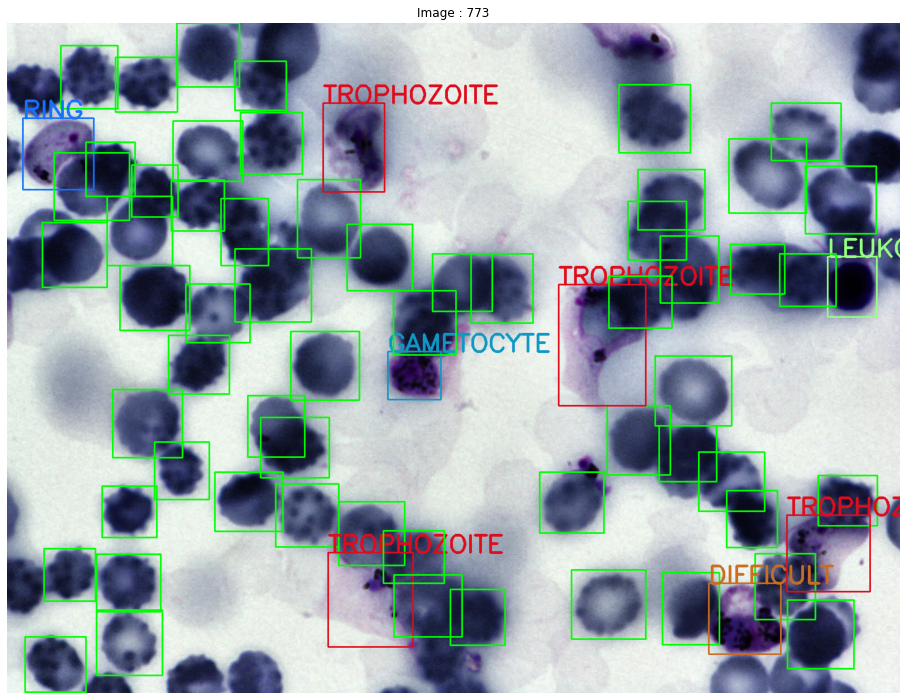

In [0]:
img = DrawImg(df_train, 773).plot()

In [0]:
df_test['image_pathname'][93]

'/images/408745a6-79fb-4804-9c24-e2d6673f8f2e.jpg'

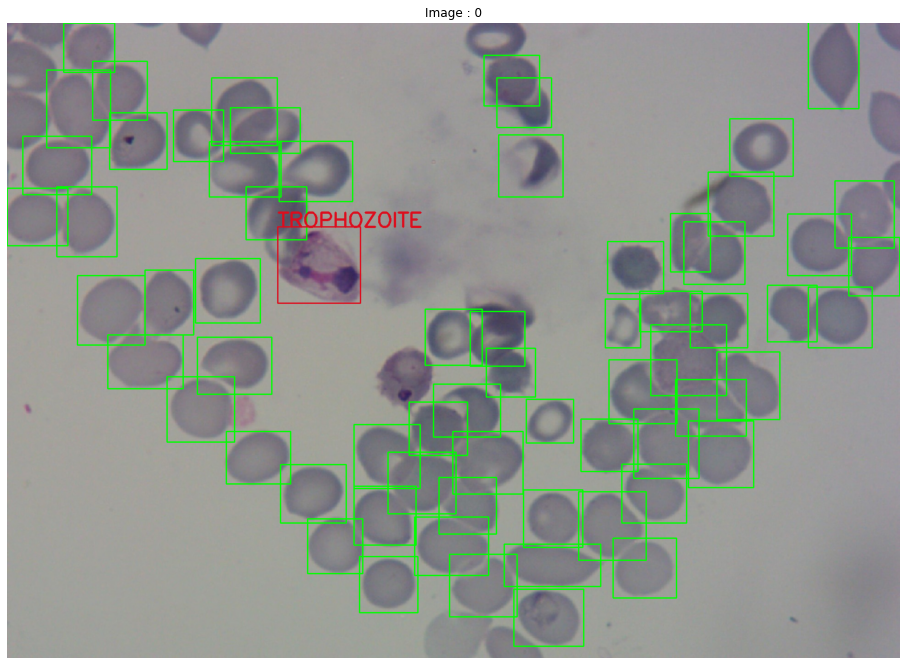

In [0]:
img = DrawImg(df_test, 0).plot()

In [0]:
df_test['image_pathname'][0]

'/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg'

In [0]:
df_test[df_test['image_pathname'] == '/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg']

,image_checksum,image_pathname,image_shape_r,image_shape_c,image_shape_channels,objects_0_bounding_box_minimum_r,objects_0_bounding_box_minimum_c,objects_0_bounding_box_maximum_r,objects_0_bounding_box_maximum_c,objects_0_category,objects_1_bounding_box_minimum_r,objects_1_bounding_box_minimum_c,objects_1_bounding_box_maximum_r,objects_1_bounding_box_maximum_c,objects_1_category,objects_2_bounding_box_minimum_r,objects_2_bounding_box_minimum_c,objects_2_bounding_box_maximum_r,objects_2_bounding_box_maximum_c,objects_2_category,objects_3_bounding_box_minimum_r,objects_3_bounding_box_minimum_c,objects_3_bounding_box_maximum_r,objects_3_bounding_box_maximum_c,objects_3_category,objects_4_bounding_box_minimum_r,objects_4_bounding_box_minimum_c,objects_4_bounding_box_maximum_r,objects_4_bounding_box_maximum_c,objects_4_category,objects_5_bounding_box_minimum_r,objects_5_bounding_box_minimum_c,objects_5_bounding_box_maximum_r,objects_5_bounding_box_maximum_c,objects_5_category,objects_6_bounding_box_minimum_r,objects_6_bounding_box_minimum_c,objects_6_bounding_box_maximum_r,objects_6_bounding_box_maximum_c,objects_6_category,...,objects_100_bounding_box_minimum_r,objects_100_bounding_box_minimum_c,objects_100_bounding_box_maximum_r,objects_100_bounding_box_maximum_c,objects_100_category,objects_101_bounding_box_minimum_r,objects_101_bounding_box_minimum_c,objects_101_bounding_box_maximum_r,objects_101_bounding_box_maximum_c,objects_101_category,objects_102_bounding_box_minimum_r,objects_102_bounding_box_minimum_c,objects_102_bounding_box_maximum_r,objects_102_bounding_box_maximum_c,objects_102_category,objects_103_bounding_box_minimum_r,objects_103_bounding_box_minimum_c,objects_103_bounding_box_maximum_r,objects_103_bounding_box_maximum_c,objects_103_category,objects_104_bounding_box_minimum_r,objects_104_bounding_box_minimum_c,objects_104_bounding_box_maximum_r,objects_104_bounding_box_maximum_c,objects_104_category,objects_105_bounding_box_minimum_r,objects_105_bounding_box_minimum_c,objects_105_bounding_box_maximum_r,objects_105_bounding_box_maximum_c,objects_105_category,objects_106_bounding_box_minimum_r,objects_106_bounding_box_minimum_c,objects_106_bounding_box_maximum_r,objects_106_bounding_box_maximum_c,objects_106_category,objects_107_bounding_box_minimum_r,objects_107_bounding_box_minimum_c,objects_107_bounding_box_maximum_r,objects_107_bounding_box_maximum_c,objects_107_category
17,b74877b10f9fcefe509e8a22151a373b,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,1383,1944,3,666,280,771,382,red blood cell,513,98,638,230,red blood cell,941,85,1045,188,red blood cell,285,185,420,322,red blood cell,84,82,194,217,red blood cell,1110,178,1219,274,red blood cell,1250,1415,1369,1567,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


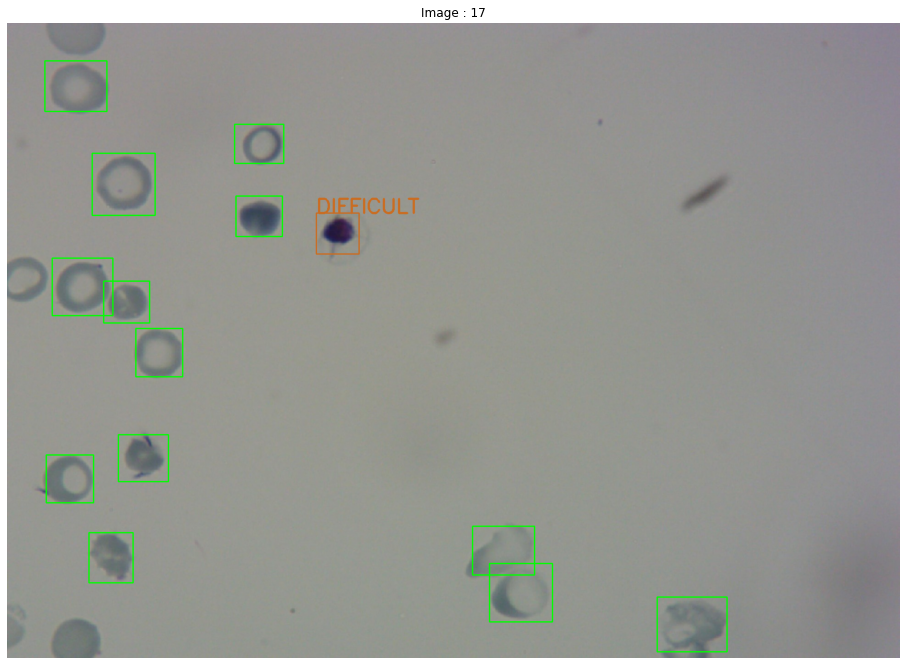

In [0]:
img = DrawImg(df_test, 17).plot()

# Reformatting the dataset

In [0]:
columns = ['pathname','minimum_r','minimum_c','maximum_r','maximum_c','category']
data_reformatted = []
data_reformatted

[]

In [0]:
# for k in range(len(data['objects'])):
#     for l in range(len(data['objects'][k])):
#         line = [data['image'][k]['pathname'],
#                 data['objects'][k][l]['bounding_box']['minimum']['r'],
#                 data['objects'][k][l]['bounding_box']['minimum']['c'],
#                 data['objects'][k][l]['bounding_box']['maximum']['r'],
#                 data['objects'][k][l]['bounding_box']['maximum']['c'],
#                 data['objects'][k][l]['category']]
#         data_reformatted.append(line)
# data_reformatted = pd.DataFrame(data_reformatted,columns=columns)

## CSV dump

In [0]:
# data_reformatted.to_csv('data_test__reformatted.csv')

# Creating annotations for YOLOv3 custom class

In [0]:
class_dict = {
    'red blood cell': 0,
    'leukocyte' : 1,
    'trophozoite': 2,
    'gametocyte' : 3,
    'ring' : 4,
    'schizont' : 5,
    'difficult' :6
    }

class_dict

{'difficult': 6,
 'gametocyte': 3,
 'leukocyte': 1,
 'red blood cell': 0,
 'ring': 4,
 'schizont': 5,
 'trophozoite': 2}

In [0]:
DON'T RUN CELLS BELOW!

SyntaxError: ignored

In [0]:
# for idx in range(df_train.shape[0]):
#   path_name = df_train.loc[idx, 'image_pathname'].split('/')[-1].split('.')[0]
#   print(path_name)
#   for i in range(222):
#     current_object= df_train.loc[idx,[x for x in df_train.columns if "_" + str(i) + "_" in x]]

#     cell_class = current_object['objects_{}_category'.format(i)] 
#     if type(cell_class) is str:
#       cell_class = class_dict[cell_class]
#       x_center_normed = (current_object['objects_{}_bounding_box_maximum_c'.format(str(i))] + current_object['objects_{}_bounding_box_minimum_c'.format(str(i))])/(1600*2)
#       y_center_normed = (current_object['objects_{}_bounding_box_maximum_r'.format(str(i))] + current_object['objects_{}_bounding_box_minimum_r'.format(str(i))])/(1200*2)
#       height_normed = (current_object['objects_{}_bounding_box_maximum_r'.format(str(i))] - current_object['objects_{}_bounding_box_minimum_r'.format(str(i))])/1200
#       width_normed = (current_object['objects_{}_bounding_box_maximum_c'.format(str(i))] - current_object['objects_{}_bounding_box_minimum_c'.format(str(i))])/1600
    
#       line =  str(cell_class)+ " "+ str(x_center_normed) + " " + str(y_center_normed) + " " + str(width_normed) + " " + str(height_normed)
#       with open( 'data/images/' + path_name + '.txt', 'a') as the_file:
#         the_file.write(line+'\n')

# Create folder with train images and labels

In [0]:
import os
import glob

In [0]:
txt_files = glob.glob('data/images/*txt')
len(txt_files)

1208

In [0]:
import shutil

In [0]:
txt_files[0]

'data/images/1e86933d-6a5a-4a3c-a0f2-ca22afd767b3.txt'

## Copy txt files

In [0]:
# for i in range(len(txt_files)):
#   original = r'{}'.format(txt_files[i])
#   target = r'{}/{}'.format('prep/obj', txt_files[i].split('/',2)[2])
#   shutil.copyfile(original, target)

## Copy png files (train images)

In [0]:
png_files = glob.glob('data/images/*png')
len(png_files)

1208

In [0]:
png_files[0]

'data/images/68e69cfb-1a07-48d2-8abe-46b46fe264ed.png'

In [0]:
# for i in range(len(png_files)):
#   original = r'{}'.format(png_files[i])
#   target = r'{}/{}'.format('prep/obj', png_files[i].split('/',2)[2])
#   shutil.copyfile(original, target)

In [0]:
png_files_copy = glob.glob('prep/obj/*png')
len(png_files_copy)

1208

#Copy test images

In [0]:
jpg_files = glob.glob('data/images/*jpg')
len(jpg_files), jpg_files[0]

(120, 'data/images/6d9a2241-2cce-42b3-a11d-a3a6b432dd89.jpg')

In [0]:
# for i in range(len(png_files)):
#   original = r'{}'.format(png_files[i])
#   target = r'{}/{}'.format('prep/obj', png_files[i].split('/',2)[2])
#   shutil.copyfile(original, target)

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/malaria'

/content/drive/.shortcut-targets-by-id/1M7O03iVQz3__mtDwQPOAPt_bknu3RvUO/malaria


In [0]:
# for i in range(len(jpg_files)):
#   original = r'{}'.format(jpg_files[i])
#   target = r'{}/{}'.format('prep/obj_test', jpg_files[i].split('/',2)[2])
#   shutil.copyfile(original, target)

# Safe folder as zip

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/malaria/prep/obj_test'

/content/drive/.shortcut-targets-by-id/1M7O03iVQz3__mtDwQPOAPt_bknu3RvUO/malaria/prep/obj_test


In [0]:
# from zipfile import ZipFile

# with ZipFile('obj_test.zip', 'a') as zipObj:
#   for jpg in jpg_files:
#     zipObj.write(jpg.split('/', -1)[2])

In [0]:
test_files = glob.glob('prep/obj_test/*')
len(test_files)

121

#Preparing YOLO output for calculating metrics 

## Loading test set cells df

In [0]:
df_reformatted = pd.read_csv('data_reformatted.csv')
df_reformatted

,Unnamed: 0,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
0,0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,red blood cell
1,1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,red blood cell
2,2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,red blood cell
3,3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,red blood cell
4,4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,red blood cell
...,...,...,...,...,...,...,...
160221,160221,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,757,520,873,595,red blood cell
160222,160222,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,trophozoite
160223,160223,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,510,453,595,570,red blood cell
160224,160224,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,red blood cell


## Loading YOO output txt

In [0]:
test = open("result_test_set.txt","r") 
content= test.readlines()
test.close() 

In [0]:
content[:60]

['net.optimized_memory = 0 \n',
 'mini_batch = 1, batch = 1, time_steps = 1, train = 0 \n',
 '\n',
 ' seen 64, trained: 518 K-images (8 Kilo-batches_64) \n',
 'Enter Image Path: data/obj/31c62771-4e90-4038-9abc-d196beda9898.jpg: Predicted in 103.023000 milli-seconds.\n',
 'red_blood_cell: 91%\t(left_x:   -1   top_y:  232   width:   95   height:  138)\n',
 'red_blood_cell: 85%\t(left_x:   -0   top_y:  848   width:   97   height:  121)\n',
 'red_blood_cell: 70%\t(left_x:   -0   top_y:  504   width:   79   height:  119)\n',
 'red_blood_cell: 85%\t(left_x:    0   top_y:  370   width:   80   height:  129)\n',
 'red_blood_cell: 99%\t(left_x:   88   top_y: 1152   width:  138   height:  138)\n',
 'red_blood_cell: 97%\t(left_x:  238   top_y: 1315   width:  141   height:   67)\n',
 'red_blood_cell: 99%\t(left_x:  259   top_y: 1017   width:  123   height:  115)\n',
 'red_blood_cell: 100%\t(left_x:  275   top_y:  340   width:  128   height:  111)\n',
 'red_blood_cell: 96%\t(left_x:  297   top_y:  

## Extract values from results and create list of lists fo df

In [0]:
images = []
img_names = []
for i in content[4:]:
  image = []
  if 'Enter Image Path' in i:
    try:
      img = [name[:-1].split('/')[-1] for name in  i.split(" ") if ".jpg" in name][0]
      img_names.append(img)
    except IndexError:
      pass
  else:
    image.append(img_names[-1])

    cell_name = i.split(": ")[0]
    coords = i.split("(")[1].split(')')[0]
    split_coords = coords.split(' ')
    i = 0
    while i<4:
      for element in split_coords:
        try:
          number = int(element)
          image.append(number)
          i+=1
        except Exception:
          pass
    image.append(cell_name)
    images.append(image)


len(images)

6903

In [0]:
df = pd.DataFrame(images, columns=['pathname', 'minimum_c',	'minimum_r',	'maximum_c',	'maximum_r',	'category'])
df.head()

,pathname,minimum_c,minimum_r,maximum_c,maximum_r,category
0,31c62771-4e90-4038-9abc-d196beda9898.jpg,-1,232,95,138,red_blood_cell
1,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,848,97,121,red_blood_cell
2,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,504,79,119,red_blood_cell
3,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,370,80,129,red_blood_cell
4,31c62771-4e90-4038-9abc-d196beda9898.jpg,88,1152,138,138,red_blood_cell


In [0]:
convert_names = [x for x in df.columns if "_" in x]
convert_names

['minimum_c', 'minimum_r', 'maximum_c', 'maximum_r']

In [0]:
df[convert_names].astype('int')

,minimum_c,minimum_r,maximum_c,maximum_r
0,-1,232,95,138
1,0,848,97,121
2,0,504,79,119
3,0,370,80,129
4,88,1152,138,138
...,...,...,...,...
6898,1282,99,162,144
6899,1295,845,145,124
6900,1673,1053,136,137
6901,1800,972,128,135


In [0]:
df

,pathname,minimum_c,minimum_r,maximum_c,maximum_r,category
0,31c62771-4e90-4038-9abc-d196beda9898.jpg,-1,232,95,138,red_blood_cell
1,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,848,97,121,red_blood_cell
2,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,504,79,119,red_blood_cell
3,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,370,80,129,red_blood_cell
4,31c62771-4e90-4038-9abc-d196beda9898.jpg,88,1152,138,138,red_blood_cell
...,...,...,...,...,...,...
6898,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1282,99,162,144,red_blood_cell
6899,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1295,845,145,124,red_blood_cell
6900,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1673,1053,136,137,red_blood_cell
6901,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1800,972,128,135,red_blood_cell


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pathname   6903 non-null   object
 1   minimum_c  6903 non-null   int64 
 2   minimum_r  6903 non-null   int64 
 3   maximum_c  6903 non-null   int64 
 4   maximum_r  6903 non-null   int64 
 5   category   6903 non-null   object
dtypes: int64(4), object(2)
memory usage: 323.7+ KB


##Transform values to get maximum_r/c values instead of width and height

In [0]:
df.maximum_c += df.minimum_c
df.maximum_r += df.minimum_r
df

,pathname,minimum_c,minimum_r,maximum_c,maximum_r,category
0,31c62771-4e90-4038-9abc-d196beda9898.jpg,-1,232,94,370,red_blood_cell
1,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,848,97,969,red_blood_cell
2,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,504,79,623,red_blood_cell
3,31c62771-4e90-4038-9abc-d196beda9898.jpg,0,370,80,499,red_blood_cell
4,31c62771-4e90-4038-9abc-d196beda9898.jpg,88,1152,226,1290,red_blood_cell
...,...,...,...,...,...,...
6898,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1282,99,1444,243,red_blood_cell
6899,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1295,845,1440,969,red_blood_cell
6900,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1673,1053,1809,1190,red_blood_cell
6901,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1800,972,1928,1107,red_blood_cell


In [0]:
df_reformatted = pd.read_csv('data_test__reformatted.csv')
df_reformatted

,Unnamed: 0,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
0,0,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,576,1744,708,1883,red blood cell
1,1,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,863,1249,977,1373,red blood cell
2,2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,210,1573,335,1711,red blood cell
3,3,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1017,1124,1142,1253,red blood cell
4,4,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,572,1655,695,1763,red blood cell
...,...,...,...,...,...,...,...
11839,11839,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1047,694,1145,787,red blood cell
11840,11840,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,543,1381,617,1464,red blood cell
11841,11841,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1041,1725,1196,1880,ring
11842,11842,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,526,374,653,508,ring


In [0]:
df_reformatted['pathname'].value_counts()

/images/511b6e13-acd7-4dd3-b1d0-c4aa10a514c7.jpg    216
/images/f0ee03d6-c57b-43a0-8812-359330bdb93a.jpg    208
/images/b9025f55-789d-4acb-9c0a-34e877c95c5c.jpg    196
/images/8448ac8c-fa7a-475a-9ca2-dc0174f78a39.jpg    178
/images/294bc238-efdb-4f88-b83b-f41fe5750106.jpg    170
                                                   ... 
/images/7d16d1e8-4abf-46fc-81bc-d71bd08ed6f2.jpg     44
/images/0e0bc36f-6fb2-4763-b0a1-b4c67b2d2d2a.jpg     44
/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg     28
/images/bd4da4f8-8996-47e0-a4e5-a3da5717441e.jpg     26
/images/ebb53337-1d4f-4ab5-9b6d-83a66f48fe2e.jpg     24
Name: pathname, Length: 120, dtype: int64

In [0]:
df['pathname'].value_counts()

511b6e13-acd7-4dd3-b1d0-c4aa10a514c7.jpg    118
efb85f8e-c780-4a19-b6ce-555a154b0d10.jpg    100
a5c8bf78-61e2-492d-bae5-0ffeea81212b.jpg     99
b9025f55-789d-4acb-9c0a-34e877c95c5c.jpg     90
25865b39-56fb-409a-8800-3d368dd264ed.jpg     87
                                           ... 
21116b9d-e6be-483f-8394-e74622b2e182.jpg     28
bd4da4f8-8996-47e0-a4e5-a3da5717441e.jpg     19
51f6463c-1622-4c0d-8482-b864e0ed2e74.jpg     17
ebb53337-1d4f-4ab5-9b6d-83a66f48fe2e.jpg     13
54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg     10
Name: pathname, Length: 120, dtype: int64

In [0]:
df_reformatted[df_reformatted['pathname'] == '/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg'].shape

(28, 7)

In [0]:
df_reformatted = df_reformatted.drop(columns=['Unnamed: 0'])
df_reformatted

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
0,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,576,1744,708,1883,red blood cell
1,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,863,1249,977,1373,red blood cell
2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,210,1573,335,1711,red blood cell
3,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1017,1124,1142,1253,red blood cell
4,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,572,1655,695,1763,red blood cell
...,...,...,...,...,...,...
11839,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1047,694,1145,787,red blood cell
11840,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,543,1381,617,1464,red blood cell
11841,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1041,1725,1196,1880,ring
11842,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,526,374,653,508,ring


##Need to drop duplicates, for some reason cells were duplicated in csv

In [0]:
df_reformatted = df_reformatted.drop_duplicates()
df_reformatted

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
0,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,576,1744,708,1883,red blood cell
1,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,863,1249,977,1373,red blood cell
2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,210,1573,335,1711,red blood cell
3,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1017,1124,1142,1253,red blood cell
4,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,572,1655,695,1763,red blood cell
...,...,...,...,...,...,...
5917,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1047,694,1145,787,red blood cell
5918,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,543,1381,617,1464,red blood cell
5919,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,1041,1725,1196,1880,ring
5920,/images/887cc81a-bae3-4360-a115-23ae05ac3a4f.jpg,526,374,653,508,ring


In [0]:
df_reformatted[df_reformatted['pathname'] == '/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg']

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
860,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,666,280,771,382,red blood cell
861,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,513,98,638,230,red blood cell
862,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,941,85,1045,188,red blood cell
863,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,285,185,420,322,red blood cell
864,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,84,82,194,217,red blood cell
865,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,1110,178,1219,274,red blood cell
866,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,1250,1415,1369,1567,red blood cell
867,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,1177,1050,1304,1187,red blood cell
868,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,378,498,466,599,red blood cell
869,/images/54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,563,210,654,310,red blood cell


In [0]:
df= df[['pathname', 'minimum_r', 'minimum_c', 'maximum_r','maximum_c','category']]
df

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
0,31c62771-4e90-4038-9abc-d196beda9898.jpg,232,-1,370,94,red_blood_cell
1,31c62771-4e90-4038-9abc-d196beda9898.jpg,848,0,969,97,red_blood_cell
2,31c62771-4e90-4038-9abc-d196beda9898.jpg,504,0,623,79,red_blood_cell
3,31c62771-4e90-4038-9abc-d196beda9898.jpg,370,0,499,80,red_blood_cell
4,31c62771-4e90-4038-9abc-d196beda9898.jpg,1152,88,1290,226,red_blood_cell
...,...,...,...,...,...,...
6898,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,99,1282,243,1444,red_blood_cell
6899,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,845,1295,969,1440,red_blood_cell
6900,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,1053,1673,1190,1809,red_blood_cell
6901,5bfde411-aa51-45d0-8b67-a57c5f1e628b.jpg,972,1800,1107,1928,red_blood_cell


In [0]:
df[df['pathname'] == '54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg']

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category
4002,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,509,2,615,100,red_blood_cell
4003,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,939,71,1050,196,red_blood_cell
4004,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,-2,84,82,220,red_blood_cell
4005,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,89,88,207,227,red_blood_cell
4006,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,1291,93,1381,213,red_blood_cell
4007,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,519,104,638,229,red_blood_cell
4008,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,289,191,423,328,red_blood_cell
4009,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,565,218,650,314,red_blood_cell
4010,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,668,274,775,389,red_blood_cell
4011,54c88d45-30c3-46f8-8fef-b3e9c07781f2.jpg,383,500,477,599,red_blood_cell


#Find closest image in results for metrics on test set

In [0]:
for i in range(df_reformatted.shape[0]):
  current_cell = df_reformatted.loc[i, :]


  searched_path = current_cell.pathname.split('/')[-1]
  searched_minimum_r = current_cell.minimum_r
  searched_maximum_r = current_cell.maximum_r
  searched_minimum_c = current_cell.minimum_c
  searched_maximum_c = current_cell.maximum_c
  searched_category = current_cell.category

  print(searched_minimum_r, searched_maximum_r)

  df_temp = df[df['pathname'] == searched_path].copy()
  min_r_range = (df_temp.minimum_r >=searched_minimum_r -5) & (df_temp.minimum_r <=searched_minimum_r +5)
  max_r_range = (df_temp.maximum_r >=searched_maximum_r -5) & (df_temp.maximum_r <=searched_maximum_r +5)
  min_c_range = (df_temp.minimum_c >=searched_minimum_c -5) & (df_temp.minimum_c <=searched_minimum_c +5)
  max_c_range = (df_temp.maximum_c >=searched_maximum_c -5) & (df_temp.maximum_c <=searched_maximum_c +5)

  solution = df_temp.where( min_r_range & max_r_range ).dropna()[['minimum_r', 'maximum_r', 'category']]
  print(solution.category.values.tolist())

  solution_list = solution.category.values.tolist()
  if len(solution_list) > 0 :
    solution_list = solution_list
  else:
    solution_list.append('none')
  print(df_temp.where( min_r_range & max_r_range ).dropna().shape)
  df_reformatted.loc[i, 'found_cell'] = df_reformatted.loc[i, 'found_cell'] = solution_list[0] 







In [0]:
df_reformatted.head(60)

,pathname,minimum_r,minimum_c,maximum_r,maximum_c,category,found_cell
0,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,576,1744,708,1883,red blood cell,red_blood_cell
1,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,863,1249,977,1373,red blood cell,none
2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,210,1573,335,1711,red blood cell,red_blood_cell
3,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1017,1124,1142,1253,red blood cell,red_blood_cell
4,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,572,1655,695,1763,red blood cell,red_blood_cell
5,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,477,1307,590,1429,red blood cell,red_blood_cell
6,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,962,595,1089,738,red blood cell,red_blood_cell
7,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,417,1699,551,1838,red blood cell,none
8,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1162,767,1284,894,red blood cell,red_blood_cell
9,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1080,654,1199,774,red blood cell,red_blood_cell


##Check value_counts() in both columns and safe csv

In [0]:
df_reformatted['category'].value_counts()

red blood cell    5614
ring               169
trophozoite        111
gametocyte          12
schizont            11
difficult            5
Name: category, dtype: int64

In [0]:
df_reformatted['found_cell'].value_counts()

red_blood_cell    3039
none              2835
difficult           20
trophozoite         19
ring                 9
Name: found_cell, dtype: int64

In [0]:
df_reformatted.to_csv('test_score.csv')